# Popularity approch
**Goal:** A study of how the popularity approval interacts with the sentiment measure in the speechs <br>
* Download a realible source of popularity data ✔️
* Plot populatity over time vs sentiment over time

## Load data

In [42]:
# Libraries
from urllib import request
from pathlib import Path
import os
import plotly
import sys
import pandas as pd
import plotly.express as px

# Basic paths
src_path = str(Path.cwd().parent / "src")
sys.path.append(src_path)

project_path = Path().resolve().parent

In [2]:
# Download the source

download_path = project_path / "sentiment_analysis"  # To change later

if list(Path(download_path).glob("*-job-approval-*.xlsx")) == []:
    # Define the remote file to retrieve
    remote_url = 'https://today.yougov.com/_pubapis/v5/us/trackers/president-obama-job-approval-rating/download/'
    # Define the local filename to save data
    local_file = download_path / 'obama-job-approval-ratings.xlsx'
    # Download remote and save locally
    request.urlretrieve(remote_url, local_file)
else:
    pass


In [3]:
# Open the popularity data 
df_ppl = pd.read_excel(download_path / 'obama-job-approval-ratings.xlsx')
df_ppl = df_ppl.T
df_ppl.head()

,0,1,2,3,4
Do you approve or disapprove of the way Barack Obama is handling his job as President?,Approve,Disapprove,Not sure,Unweighted base,Base
2009-01-15,0.62,0.17,0.22,983.0,981.0
2009-01-29,0.57,0.28,0.15,996.0,996.0
2009-02-05,0.52,0.33,0.15,993.0,991.0
2009-02-12,0.54,0.31,0.14,997.0,998.0


In [4]:
# Open the sentiment data

df_sa = pd.read_csv(download_path / 'results_sa_all.txt')
df_sa.head()

,title,date,stanza,textblob,vader,subjectivity
0,Prayer_Breakfast_2016,2016-02-04,0.099,0.178,1.000,0.542
1,Security_Team_Announcement,2008-12-01,0.140,0.162,0.998,0.403
2,Cairo_University,2009-06-04,-0.150,0.110,1.000,0.457
3,Umpqua_Community_College_Shootings,2015-10-01,-0.250,0.061,-0.998,0.435
4,White_House_Correspondent_Dinner_2013,2013-04-27,-0.012,0.145,1.000,0.501


## Plots

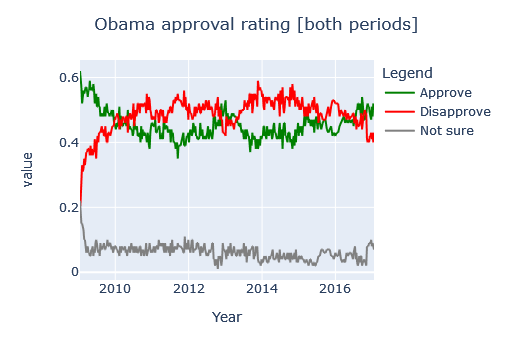

In [41]:
# Plot obama ratings

fig = px.line(df_ppl, x=df_ppl.index, y=[0,1,2], 
              color_discrete_sequence=["green", "red", "grey"])
fig.update_layout(title = {"text":"Obama approval rating [both periods]", "x":0.5},
                  legend_title = "Legend",
                  xaxis_title = "Year")
newnames = {'0':'Approve', '1': 'Disapprove', '2': 'Not sure'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))

fig.show()

In [ ]:
# Plot sentiment plus ratings

